In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier,LogisticRegression, Lasso
from sklearn.metrics import accuracy_score,classification, confusion_matrix,classification_report,precision_score,roc_curve, recall_score, roc_auc_score 
import eli5
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
init_notebook_mode(connected=True)
from IPython.display import Image
import scipy
from scipy.stats import norm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tqdm import tqdm_notebook
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE# import Pipelin

/home/helga/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/helga/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/helga/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_select

In [2]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [3]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Data

In [4]:
train_prepared = pd.read_csv('data/TRAIN_PREPARED.csv')
train_raw = pd.read_csv('data/TRAIN_RAW_DATA.csv')
train_additional_data = pd.read_csv('data/TRAIN_ADDITIONAL_DATA.csv')

In [5]:
test_prepared = pd.read_csv('data/TEST_PREPARED.csv')
test_raw = pd.read_csv('data/TEST_RAW_DATA.csv')
test_additional_data = pd.read_csv('data/TEST_ADDITIONAL_DATA.csv')

In [38]:
train_prepared.head()

,cut_date,days_to_end,first_date,last_date,num_country_max_1days,num_city_max_1days,android_max_1days,smarttv_max_1days,iphone_max_1days,ipad_max_1days,apple_max_1days,pc_max_1days,time_spent_sum_3days,time_spent_max_3days,num_title_ep_sum_3days,num_title_ep_max_3days,num_title_ru_sum_3days,num_title_ru_max_3days,num_country_max_3days,num_city_max_3days,other_content_sum_3days,top_1_sum_3days,top_2_sum_3days,top_3_sum_3days,top_4_sum_3days,top_5_sum_3days,top_6_sum_3days,top_7_sum_3days,top_8_sum_3days,top_9_sum_3days,top_10_sum_3days,android_max_3days,smarttv_max_3days,iphone_max_3days,ipad_max_3days,apple_max_3days,pc_max_3days,time_spent_sum_7days,time_spent_max_7days,num_title_ep_sum_7days,num_title_ep_max_7days,num_title_ru_sum_7days,num_title_ru_max_7days,num_country_max_7days,num_city_max_7days,other_content_sum_7days,top_1_sum_7days,top_2_sum_7days,top_3_sum_7days,top_4_sum_7days,top_5_sum_7days,top_6_sum_7days,top_7_sum_7days,top_8_sum_7days,top_9_sum_7days,top_10_sum_7days,android_max_7days,smarttv_max_7days,iphone_max_7days,ipad_max_7days,apple_max_7days,pc_max_7days,time_spent_sum_14days,time_spent_max_14days,num_title_ep_sum_14days,num_title_ep_max_14days,num_title_ru_sum_14days,num_title_ru_max_14days,num_country_max_14days,num_city_max_14days,other_content_sum_14days,top_1_sum_14days,top_2_sum_14days,top_3_sum_14days,top_4_sum_14days,top_5_sum_14days,top_6_sum_14days,top_7_sum_14days,top_8_sum_14days,top_9_sum_14days,top_10_sum_14days,android_max_14days,smarttv_max_14days,iphone_max_14days,ipad_max_14days,apple_max_14days,pc_max_14days,time_spent_sum_21days,time_spent_max_21days,num_title_ep_sum_21days,num_title_ep_max_21days,num_title_ru_sum_21days,num_title_ru_max_21days,num_country_max_21days,num_city_max_21days,other_content_sum_21days,top_1_sum_21days,top_2_sum_21days,top_3_sum_21days,top_4_sum_21days,top_5_sum_21days,top_6_sum_21days,top_7_sum_21days,top_8_sum_21days,top_9_sum_21days,top_10_sum_21days,android_max_21days,smarttv_max_21days,iphone_max_21days,ipad_max_21days,apple_max_21days,pc_max_21days,time_spent_sum_30days,time_spent_max_30days,num_title_ep_sum_30days,num_title_ep_max_30days,num_title_ru_sum_30days,num_title_ru_max_30days,num_country_max_30days,num_city_max_30days,other_content_sum_30days,top_1_sum_30days,top_2_sum_30days,top_3_sum_30days,top_4_sum_30days,top_5_sum_30days,top_6_sum_30days,top_7_sum_30days,top_8_sum_30days,top_9_sum_30days,top_10_sum_30days,android_max_30days,smarttv_max_30days,iphone_max_30days,ipad_max_30days,apple_max_30days,pc_max_30days,activity_1to3,activity_1to7,activity_1to14,activity_7to14,activity_7to21,activity_7to30,activity_14to30,label
email,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8ba752f2c5,2019-04-02 00:00:00,11,2019-02-10 00:00:00,2019-03-13 09:36:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4367.0,4367.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,59073.0,25595.0,10.0,4.0,10.0,4.0,1.0,20.0,6.0,17.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
752a6d96f7,2019-04-02 00:00:00,10,2018-10-28 00:00:00,2019-04-01 20:51:29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10332.0,10152.0,12.0,9.0,5.0,2.0,1.0,11.0,0.0,0.0,1.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,10392.0,10152.0,13.0,9.0,6.0,2.0,1.0,11.0,0.0,0.0,2.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,

In [39]:
train_prepared.shape

(180249, 145)

In [20]:
train_prepared.groupby('email').size().sort_values(ascending=False)[:5]

email
44fdbef6e9    15
2ca629737e    15
0fef4eb7c8    15
8a6867cab5    15
8a8a7e85db    15
dtype: int64

Some email repeat have more examples.

In [6]:
train_prepared.cut_date = pd.to_datetime(train_prepared.cut_date)
train_prepared.first_date = pd.to_datetime(train_prepared.first_date)
train_prepared.last_date = pd.to_datetime(train_prepared.last_date)

In [7]:
test_prepared.cut_date = pd.to_datetime(test_prepared.cut_date)
test_prepared.first_date = pd.to_datetime(test_prepared.first_date)
test_prepared.last_date = pd.to_datetime(test_prepared.last_date)

In [8]:
train_prepared['dif_l_f_day'] = (train_prepared.last_date - train_prepared.first_date).apply(lambda x: x.days)
train_prepared['dif_c_f_day'] = (train_prepared.cut_date - train_prepared.first_date).apply(lambda x: x.days)
train_prepared['dif_l_c_day'] = (train_prepared.cut_date - train_prepared.last_date).apply(lambda x: x.days)

In [9]:
groups_train = train_prepared.groupby([train_prepared.cut_date.apply(lambda x: x.month),
                        train_prepared.cut_date.apply(lambda x: x.day
                                                    )]).groups
groups_test = test_prepared.groupby([test_prepared.cut_date.apply(lambda x: x.month),
                        test_prepared.cut_date.apply(lambda x: x.day
                                                    )]).groups

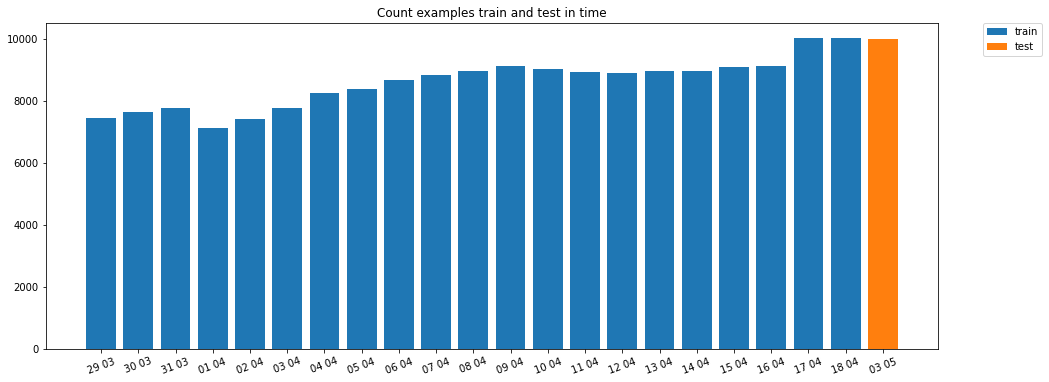

In [456]:
x_ax,y_ax = [f'{d:02} {r:02}' for r,d in groups_train.keys()],[len(i) for i in groups_train.values()]
x2_ax, y2_ax = [f'{d:02} {r:02}' for r,d in groups_test.keys()],[len(i) for i in groups_test.values()]

plt.figure(figsize=[16,6]);
plt.title('Count examples train and test in time')
plt.bar(x_ax,y_ax, label='train');
plt.legend('train')
plt.xticks(rotation=20)
plt.bar(x2_ax, y2_ax, label='test');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=20);

In [10]:
train_prepared = train_prepared.sort_values(by='cut_date')

In [11]:
cols = [i for i in train_prepared.columns if 'date' not in i and i!= 'email']
# cols = [i for i in train_prepared.columns if 'date' not in i]

In [12]:
# train = train_prepared[cols]
train = train_prepared[cols]

### Analysis

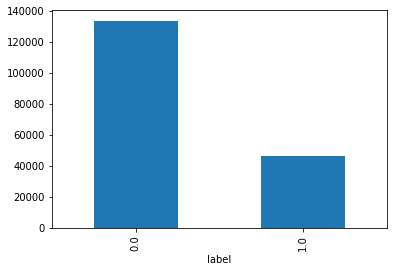

In [465]:
train.groupby('label').size().plot(kind='bar')

In the training dataset for each class label is not balanced

In [26]:
y_True = train[(train.label == 1)]
print ("Churn Percentage = "+str( (y_True.shape[0] / train["label"].shape[0]) * 100 ))

Churn Percentage = 25.909158996721203


In [39]:
for c in train_prepared.columns:
    if train_prepared[c].isna().any():
        print(c, train_prepared[c].isna().sum()/train_prepared.shape[0])

There are no nan values

In [22]:
corr_label = train_prepared[cols].corr()['label']
corr_label.sort_values()[:10]

num_country_max_7days     -0.194676
num_title_ru_max_7days    -0.176016
num_country_max_14days    -0.171498
num_title_ru_sum_7days    -0.171414
num_country_max_3days     -0.170723
num_title_ru_sum_14days   -0.170422
num_title_ru_max_14days   -0.166872
num_title_ru_max_3days    -0.155283
num_title_ru_sum_3days    -0.154305
num_title_ep_sum_14days   -0.154157
Name: label, dtype: float64

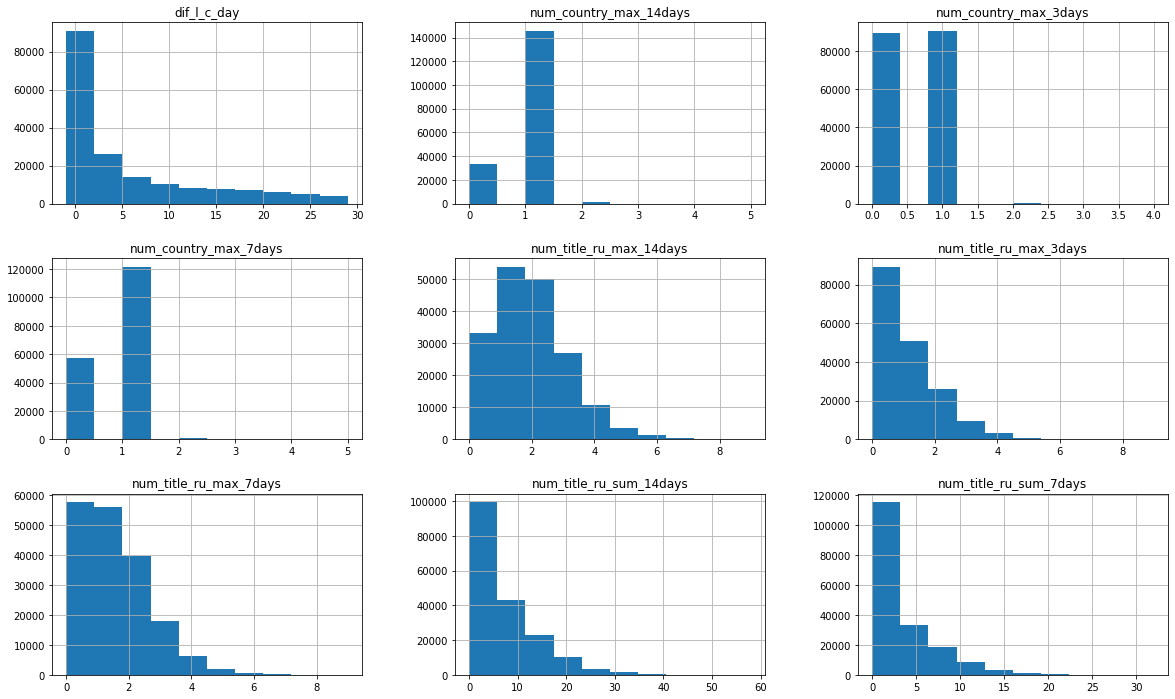

In [42]:
train_prepared[list(corr_label.sort_values()[:8].keys()) + ['dif_l_c_day']].hist(figsize=(20,12));

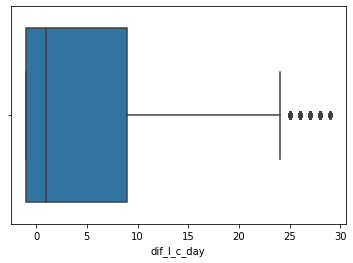

In [43]:
sns.boxplot(train.dif_l_c_day)

Most of features have lognormal distribution (we can get the log function on it in future).

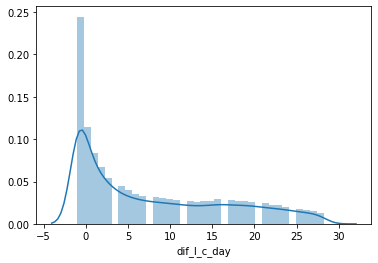

In [50]:
sns.distplot(train[train['label'] == 1]['dif_l_c_day'])

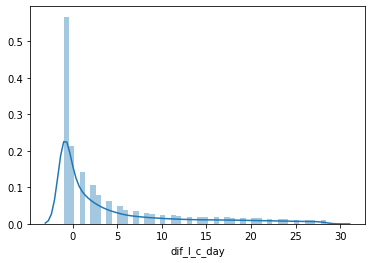

In [51]:
sns.distplot(train[train['label'] == 0]['dif_l_c_day'])

In [53]:
pd.crosstab(train['label'], train['num_country_max_14days'], margins=True)

num_country_max_14days,0.0,1.0,2.0,3.0,4.0,5.0,All
label,,,,,,,
0.0,19351,112916,1231,37,5,8,133548
1.0,13946,32513,233,9,0,0,46701
All,33297,145429,1464,46,5,8,180249


## Models

In [13]:
y = train['label']
X = train.drop(columns=['label'])

In [70]:
# Spot Check Algorithms
models = []
models.append(('LC', LogisticRegression()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GB' ,GradientBoostingClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

In [68]:
def my_cv(data,target,model=LogisticRegression(),score='roc_auc',val_size=0.3,make_prediction=False):
    """
    Method of cross-validation which consider time stamps. Should send sorted data
    """
    cv_result = []
#     train_ind
    
    val_ind = round(data.shape[0]*val_size)
    X_train_ = data.iloc[:val_ind]
    y_train_ = target.iloc[:val_ind]
    X_val_ = data.iloc[val_ind:]
    y_val_ = target.iloc[val_ind:]
#     X_val_.shape

    if make_prediction:
        model.fit(X_train_,y_train_)
        y_pred_ = model.predict(X_val_)
        if score == 'roc_auc':
            res = roc_auc_score(y_val_,y_pred_)
        elif score == 'accuracy':
            res = accuracy_score(y_val_,y_pred_)
        elif score == 'precision':
            res = precision_score(y_val_,y_pred_)
        elif score == 'recall':
            res = recall_score(y_val_,y_pred_)
        cv_result.append(res)
        return np.mean(cv_result), X_train_, X_val_, y_train_, y_val_
    else:
        return X_train_, X_val_, y_train_, y_val_

I could use GroupKFold in cv but in test set exist the same emails which in the train. That's why using GroupKFold it is not nessesary and I use divide by time. 

In [71]:
for name, model in models:
    cv_results = my_cv(X,y,model,score='roc_auc',val_size=0.3,make_prediction=True)
    msg = "%s roc_auc score:%f" % (name, cv_results[0])
    print(msg)

LC roc_auc score:0.509603
AdaBoostClassifier roc_auc score:0.552880
KNN roc_auc score:0.544414
CART roc_auc score:0.593538
RandomForest roc_auc score:0.590134
GB roc_auc score:0.551230
LGBM roc_auc score:0.565166
XGB roc_auc score:0.587117


In general roc-auc is matric with describe all features of error but we should pay more attention to getection class 1 and evoiding FN errors.

In [84]:
def make_pred(X,y,model,proba=False):
    results = []
    X_train, X_test, y_train, y_test = my_cv(X,y,val_size=0.3)
#     import pdb; pdb.set_trace()
    model.fit(X_train,y_train)
#     import pdb; pdb.set_trace()
    y_pred = model.predict(X_test)
    if proba:
        y_prob = model.predict_proba(X_test)[::,1]
        return y_test, y_pred, y_prob
    return y_test, y_pred

In [15]:
def plot_conf_matrix(X,y,model,title, print_score=False):
    y_test, y_pred = make_pred(X,y,model)
    plt.figure()
    grad_ens_conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    if print_score:
        print('LogReg',':\n {}\n'.format(classification_report(y_test, y_pred)))

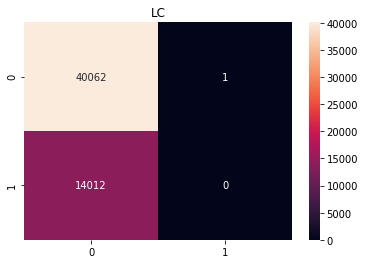

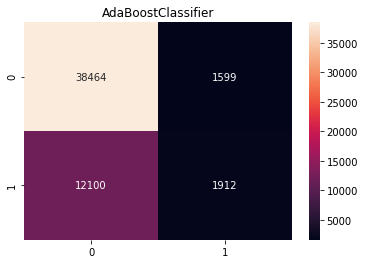

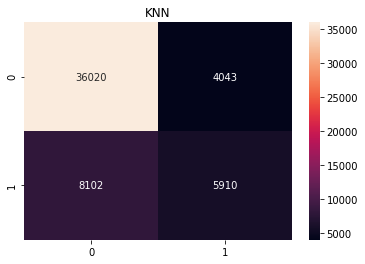

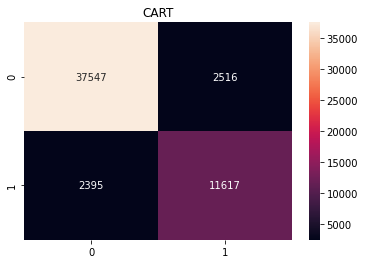

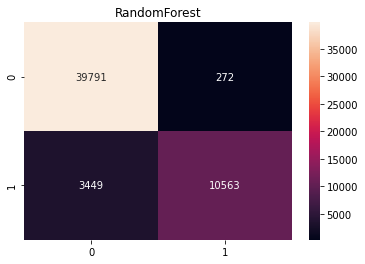

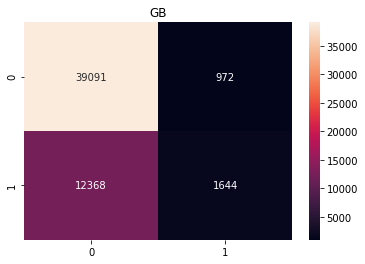

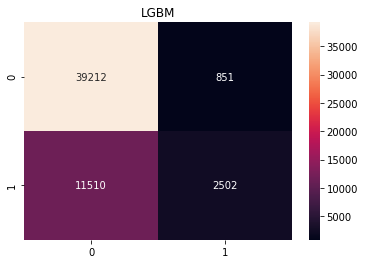

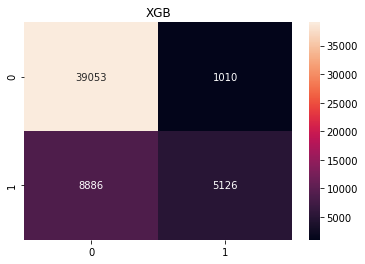

In [171]:
for name, model in tqdm_notebook(models):
    plot_conf_matrix(X,y,model,name)

*Choose logreg and check*

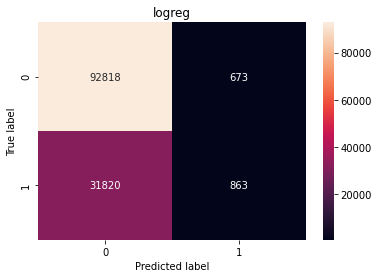

LogReg :
               precision    recall  f1-score   support

         0.0       0.74      0.99      0.85     93491
         1.0       0.56      0.03      0.05     32683

    accuracy                           0.74    126174
   macro avg       0.65      0.51      0.45    126174
weighted avg       0.70      0.74      0.64    126174




In [340]:
plot_conf_matrix(X,y,LogisticRegression(),'logreg', True)

Now it predict 1 very bad and there are a lot of false negative error which describe passing goals. If make some LogReg modification it can work better.

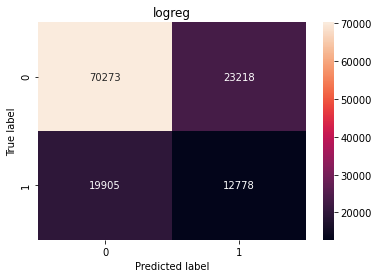

LogReg :
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.77     93491
         1.0       0.35      0.39      0.37     32683

    accuracy                           0.66    126174
   macro avg       0.57      0.57      0.57    126174
weighted avg       0.67      0.66      0.66    126174




In [342]:
plot_conf_matrix(X,y,LogisticRegression(class_weight='balanced'),'logreg', True)

A bit better with class_weight='balanced'

In [47]:
log_X = np.log1p(X)

In [83]:
for c in log_X.columns:
    log_X[c] = log_X[c].replace(np.inf, np.nan).replace(-np.inf, np.nan).fillna(log_X[c].median())

Couse a lot feats have lognormal distribution apply log function to df

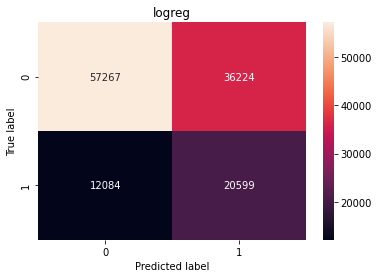

LogReg :
               precision    recall  f1-score   support

         0.0       0.83      0.61      0.70     93491
         1.0       0.36      0.63      0.46     32683

    accuracy                           0.62    126174
   macro avg       0.59      0.62      0.58    126174
weighted avg       0.71      0.62      0.64    126174




In [85]:
plot_conf_matrix(log_X,y,LogisticRegression(class_weight='balanced'),'logreg', True)

Recall attempts to answer the following question: What proportion of actual positives was identified correctly? (in heatmap chart is FN and I user 'balansed' parameter in LogLoss to correct this). We should maximase this metric because recall measures the percentage of actual customers who may stop using the service that were correctly classified.

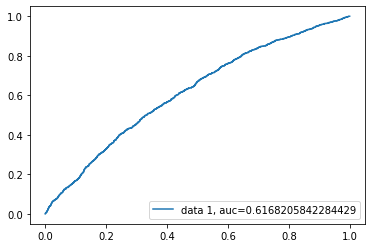

In [107]:
y_true_, y_pred_, y_prob_ = make_pred(X,y,LogisticRegression(class_weight='balanced'),proba=True)
fpr, tpr, _ = roc_curve(y_test,  y_prob_)
auc = roc_auc_score(y_test, y_prob_)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Hyperparameter optimization

In [104]:
pipe = Pipeline([('classifier' , LogisticRegression())])
# Create param grid.
X_train, X_test, y_train, y_test = train_test_split(log_X,y,test_size=0.3,random_state=17)

param_grid = [
    {'classifier' : [LogisticRegression(class_weight='balanced')],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' :[3,1,0.1,0.01,0.03,0.001],
    'classifier__solver' : ['lbfgs']}
]

# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='recall')

# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.2s finished


In [315]:
best_clf.best_params_['classifier']

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
res = (
    pd.DataFrame({
        "mean_test_score": best_clf.cv_results_["mean_test_score"],
        "mean_fit_time": best_clf.cv_results_["mean_fit_time"]})
      .join(pd.io.json.json_normalize(best_clf.cv_results_["params"]).add_prefix("param_"))
)

Logges feats with recall score

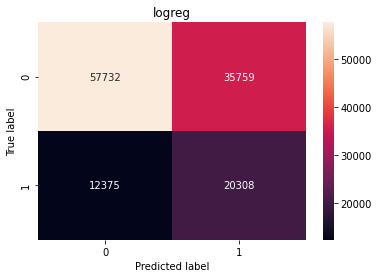

LogReg :
               precision    recall  f1-score   support

         0.0       0.82      0.62      0.71     93491
         1.0       0.36      0.62      0.46     32683

    accuracy                           0.62    126174
   macro avg       0.59      0.62      0.58    126174
weighted avg       0.70      0.62      0.64    126174




In [347]:
plot_conf_matrix(log_X,y,best_clf.best_params_['classifier'],'logreg',True)

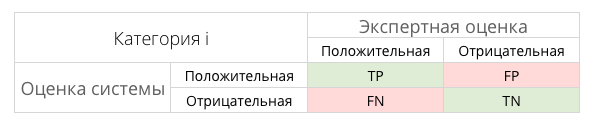

In [49]:
Image(filename='table.png') 

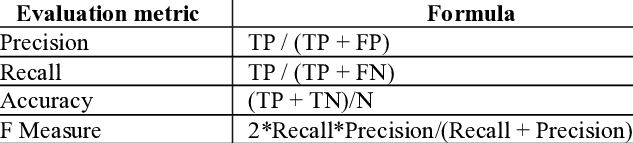

In [50]:
Image(filename='ClassificationMetrics.png') 

### OverSampling

One way to fight with class imbalance is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. 

In [358]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

pd.value_counts(y_resampled)

0.0    133548
1.0    133548
Name: label, dtype: int64

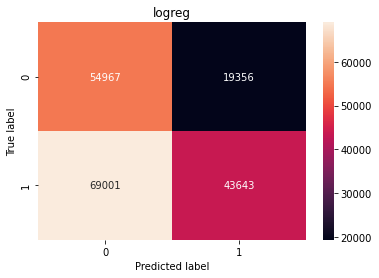

In [354]:
plot_conf_matrix(X_resampled,y_resampled,best_clf.best_params_['classifier'],'logreg')

In [359]:
log_X_res = np.log1p(X_resampled)
for c in log_X_res.columns:
    log_X_res[c] = log_X_res[c].replace([np.inf, -np.inf], np.nan).fillna(log_X_res[c].median())

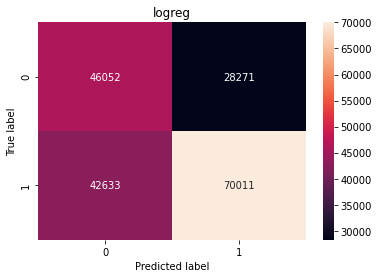

LogReg :
               precision    recall  f1-score   support

         0.0       0.52      0.62      0.57     74323
         1.0       0.71      0.62      0.66    112644

    accuracy                           0.62    186967
   macro avg       0.62      0.62      0.61    186967
weighted avg       0.64      0.62      0.62    186967




In [360]:
plot_conf_matrix(log_X_res,y_resampled,best_clf.best_params_['classifier'],'logreg',print_score=True)

**Other type of oversampling**

In [89]:
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

pd.value_counts(y_resampled_smote)

0.0    133548
1.0    133548
Name: label, dtype: int64

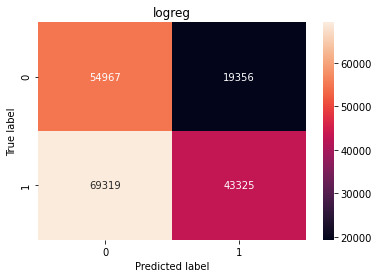

LogReg :
               precision    recall  f1-score   support

         0.0       0.44      0.74      0.55     74323
         1.0       0.69      0.38      0.49    112644

    accuracy                           0.53    186967
   macro avg       0.57      0.56      0.52    186967
weighted avg       0.59      0.53      0.52    186967




In [93]:
plot_conf_matrix(X_resampled_smote,y_resampled_smote,LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False),'logreg', True)

In [91]:
log_X_smote = np.log1p(X_resampled_smote)
for c in log_X_smote.columns:
    log_X_smote[c] = log_X_smote[c].replace([np.inf, -np.inf], np.nan).fillna(log_X_smote[c].median())

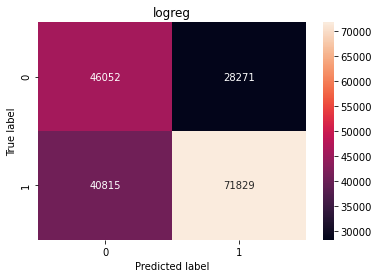

LogReg :
               precision    recall  f1-score   support

         0.0       0.53      0.62      0.57     74323
         1.0       0.72      0.64      0.68    112644

    accuracy                           0.63    186967
   macro avg       0.62      0.63      0.62    186967
weighted avg       0.64      0.63      0.63    186967




In [386]:
plot_conf_matrix(log_X_smote,y_resampled_smote,best_clf.best_params_['classifier'],'logreg', True)

## Important feats

In [68]:
feat_imp = dict(zip(X.columns,clf_final.coef_.tolist()[0]))

In [71]:
feat_imp = {k: v for k, v in sorted(feat_imp.items(), key=lambda item: item[1])}

In [78]:
list(feat_imp.keys())[:10]+list(feat_imp.keys())[-10:]

['num_country_max_3days',
 'apple_max_30days',
 'num_title_ep_sum_14days',
 'dif_c_f_day',
 'top_8_sum_14days',
 'top_10_sum_3days',
 'num_country_max_30days',
 'num_title_ru_sum_3days',
 'top_10_sum_21days',
 'num_title_ru_max_7days',
 'apple_max_21days',
 'top_8_sum_7days',
 'num_title_ru_sum_7days',
 'num_country_max_14days',
 'apple_max_3days',
 'num_title_ru_max_3days',
 'num_country_max_21days',
 'top_10_sum_14days',
 'num_country_max_7days',
 'num_country_max_1days']

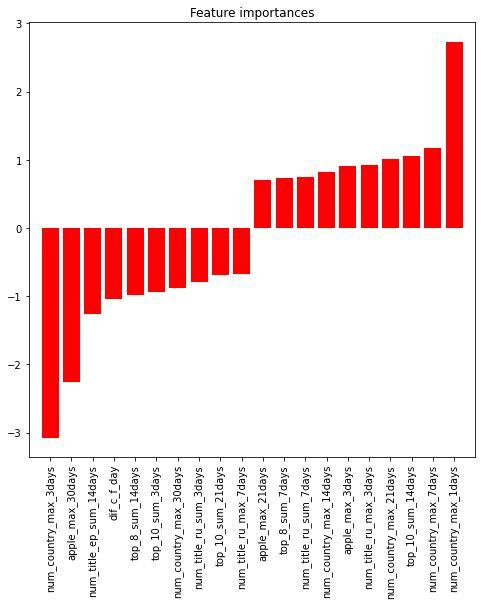

In [81]:
plt.figure(figsize=(8,8))
plt.title("Feature importances")
names_cols = list(feat_imp.keys())[:10]+list(feat_imp.keys())[-10:]
plt.bar(names_cols,
        list(feat_imp.values())[:10]+list(feat_imp.values())[-10:],
        color="r", align="center")
plt.xticks(rotation='vertical')
plt.xlim([-1, len(names_cols)])
plt.show()

In [ ]:
# more_imp_col = [c for c, v in feat_imp.items() if np.abs(v) > 0.1]

### Make prediction

In [375]:
test_submit_example = pd.read_csv('data/test_submit_example.csv')

In [377]:
test_submit_example.head()

,email,prediction
0,e98a93bfc7,0.001
1,d813ccb3f5,0.001
2,3d07a90a91,0.001
3,5791e966d8,0.001
4,d982336d49,0.001


In [95]:
def prep_data(df, train=True):
    df.cut_date = pd.to_datetime(df.cut_date)
    df.first_date = pd.to_datetime(df.first_date)
    df.last_date = pd.to_datetime(df.last_date)
    df['dif_l_f_day'] = (df.last_date - df.first_date).apply(lambda x: x.days)
    df['dif_c_f_day'] = (df.cut_date - df.first_date).apply(lambda x: x.days)
    df['dif_l_c_day'] = (df.cut_date - df.last_date).apply(lambda x: x.days)
    cols = [i for i in df.columns if 'date' not in i]
    df = df[cols].set_index('email')
    if train:
        y = df['label']
        X = df.drop(columns=['label'])
        smote = SMOTE()
        X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
        log_X_smote = np.log1p(X_resampled_smote)
        for c in log_X_smote.columns:
            log_X_smote[c] = log_X_smote[c].replace([np.inf, -np.inf], np.nan).fillna(log_X_smote[c].median())
        return log_X_smote, y_resampled_smote
    else:
        log_X = np.log1p(df)
        log_X = log_X.replace([np.inf, -np.inf], np.nan).fillna(0)
        for c in log_X.columns:
            log_X[c] = log_X[c].replace([np.inf, -np.inf], np.nan).fillna(log_X[c].median())
        return log_X

In [96]:
X, y = prep_data(train_prepared)

In [104]:
def fit(X, y, model):
    X, y = prep_data(train_prepared)
    model = model
    model.fit(X, y)
    return model

In [107]:
def predict(X_test, fit_model, submit=False):
#     s = dat
    X_test_prep = prep_data(X_test, train=False)
    preds = fit_model.predict_proba(X_test_prep)
    if submit:
        pred_df = pd.DataFrame({'email': X_test_prep.index, 'prediction' : preds[:,1]})
        pred_df.to_csv('submit.csv')
    else:
        return preds

In [105]:
model = fit(X, y, best_clf.best_params_['classifier'])

In [109]:
pred = predict(test_prepared, fit_model=model, submit=True)